# ไฟล์นี้เป็นไฟล์ที่ทำการสำรวจข้อมูลว่าข้อมูลที่จะนำมาทดสองมีลักษณะเป็นอย่างไร 

จะเห็นได้ว่าด้านล่างนี้ import tensorflow as tf เข้ามาแล้ว tf ไม่ใช่แค่เครื่องมือทำ machine learning หรอครับ/ค่ะ?
เนื่องจากผู้พัฒนา tensorflow นั้นอยากให้คนได้เรียนรู้จึงใส่ดาต้าเซ็ตพ่วงเข้ามาให้ด้วยเลย และเราจะใช้งานในส่วนนั้นกัน

In [6]:
# TensorFlow and tf.keras
import matplotlib.pyplot as plt

# Helper libraries
import numpy as np
import tensorflow as tf

# print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices())  # แสดง processor ที่สามารถรัน tensorflow ได้
from tensorflow import keras
from tensorflow.python.client import device_lib

print(tf.__version__)
print(keras.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.10.1
2.10.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist

## Dataset Fashion_MNIST
คำสั่งโหลดข้อมูลจากดาต้าเซ็ตที่ใช้เป็นตัวอย่างในการศึกษาจำนวนไม่น้อย จะโหลดชุดข้อมูลสำหรับการเรียนรู้แบบ supervised 
ซึ่งจะมีทั้งชุดฝึกและชุดทดสอบมัดรวมมาให้แล้ว ในชุดข้อมูลฝึกก็จะมี
1. ### ตัวข้อมูลภาพฝึก (**train_images**) และเฉลย (**train_labels**)
1. ### และก็มีชุดข้อมูลทดสอบ (**test_images**) พร้อมเฉลย (**test_labels**)
***
ในกระบวนการฝึกนั้น เครื่องจะใช้ภาพฝึกเพื่อเปลี่ยนพารามิเตอร์ในการหาคำตอบให้โน้มเอียงไปเฉลยที่ให้มา 
ในระหว่างการฝึกเครื่อง เราจะค่อย ๆ ป้อนภาพฝึกและเฉลยให้เครื่อง เครื่องจะดูว่าตัวเองตอบถูกหรือผิด 
ถ้าผิดก็จะพยายามปรับวิธีหาคำตอบให้โน้มไปทางคำตอบที่ถูกต้อง ส่วนถ้าตอบถูกก็จะยังพยายามปรับให้โน้มไปในทางคำตอบที่ถูกต้องมากขึ้น
(งงไหม ถ้าพูดแบบง่าย ๆ ก็คือ เครื่องพยายามจะปรับให้ตอบถูกด้วยความมั่นใจที่มากยิ่งขึ้นนั่นเอง)

ส่วนตอนทดสอบ เครื่องจะใช้ภาพทดสอบเพื่อหาคำตอบ และเทียบกับเฉลยเพื่อดูว่าเครื่องมีความแม่นยำเท่าไหร่
ในกระบวนการทดสอบ เครื่องจะไม่พยายามเปลี่ยนพารามิเตอร์ในการหาคำตอบ เพียงแต่จะหาคำตอบมาให้และเทียบกับเฉลยเท่านั้น

สำหรับในตอนใช้งานจริง เราจะไม่มีเฉลยให้ เครื่องจะทำหน้าที่เพียงหาคำตอบให้แล้วจบไป

ทั้งนี้หากเราออกแบบการทดลองถูกต้อง เราจะต้องทำให้ภาพใน train_images และ test_images เป็นคนละภาพโดยสิ้นเชิง (disjoint set)
ส่วนเฉลยนั้นถูกเก็บไว้ใน train_labels และ test_labels

**หมายเหตุ** หากเรารันเซลล์ด้านบนนี้และเครื่องไม่พบชุดข้อมูล โปรแกรมจะทำการดาวน์โหลดชุดข้อมูลจากอินเตอร์เน็ตมาให้โดยอัตโนมัติ ดังนั้นหากเราจะรันเซลล์นี้เป็นครั้งแรกของเครื่อง เราอาจจะต้องเตรียมการเชื่อมต่ออินเตอร์เน็ตเอาไว้ด้วย

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# สังเกตุแรมที่เพิ่มขึ้น

### **Explore the data**
ในส่วนนี้เป็นการสำรวจว่าขช้อมูลที่ได้มานั้นมีลักษณะเป็นอย่างไร 

### แล้วเราใช้ชุดทดสอบกับการฝึกเครื่องได้หรือเปล่า

จากตัวแปรต่าง ๆ ข้างบน เครื่องไม่ได้รู้ด้วยซ้ำว่าอะไรเอาไว้ฝึกอะไรเอาไว้ทดสอบ เพราะขนาดภาพและฟอร์แมตของเฉลยก็เหมือนกัน เราแค่**ตั้งชื่อให้ตามที่เราชอบเท่านั้น**
ตอนฝึกเครื่องถ้าเราเอาข้อมูลทดสอบไปป้อน มันก็ฝึกได้ตามปรกติ เพียงแต่เราพยายามแยกชุดข้อมูลออกเป็นสองกลุ่มเพื่อประโยชน์ในการทดสอบเครื่องเท่านั้น 
> ### **ข้อควรระวัง** อย่านำข้อมูลชุดทดสอบใส่เข้าไปตอนฝึก

In [4]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### **ชื่อประเภทสิ่งของที่จะให้เครื่องจำแนก (Classification)**
ชื่อประเภท (class) เป็นสิ่งที่เรากำหนดได้ ซึ่งในคราสจะใช้ลิสต์เป็นตัวกำหนดชื่อ และเฟรมเวิร์คโดยส่วนใหญ่จะให้เรากำหนดชื่อพร้อมกับลำดับของประเภทไปพร้อม ๆ กัน 
นั่นคือหากเรากำหนดชื่อประเภทใดก่อนลงในลิสต์ มันจะถูกนับเป็นประเภทหมายเลข 0 ทันที ส่วนชื่อประเภทที่ตามมาก็จะมีหมายเลข 1 2 3 ไปเรื่อย ๆ

ลำดับตรงนี้มีความสำคัญกับไฟล์ข้อมูลที่เราจะใช้ในเฉลย แต่จะสำคัญอย่างไร เราจะกลับมาพิจารณากันอีกที ตอนนี้ขอให้ดูวิธีกำหนดชื่อประเภทก่อน 
ซึ่งในตัวอย่างข้างล่างนี้ ประเภทของสิ่งของที่จะจำแนกถูกระบุเป็นสตริงและมีทั้งหมด 10 ประเภท โดยมี T-shirt/top เป็นหมายเลข 0
และ Ankle boot เป็นหมายเลข 9

**แล้วจะรู้ได้อย่างไร?** สามารถดูได้จาก doc ที่ keras นั้นมีไว้ให้ >> [Link](https://keras.io/api/datasets/fashion_mnist/)
ภายใน doc จะบอกว่า class นั้นมีอะไรบ้าง
<div>
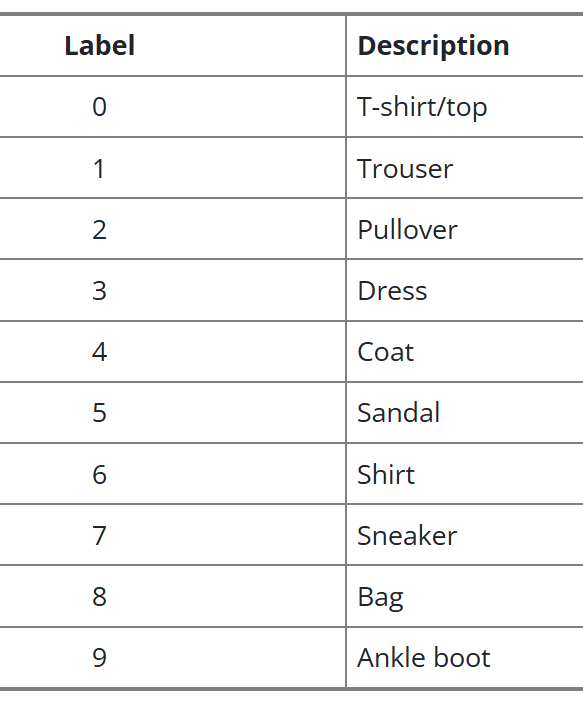
</div>

In [9]:
train_images.shape

(60000, 28, 28)

ผลลัพธ์ด้านบนเป็น ขนาดและ มิติ ของอาเรย์ที่โหลดเข้ามา

In [10]:
len(train_labels)

60000

In [11]:
train_labels.shape

(60000,)

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### **อธิบายผลลัพธ์ทางด้านบน**
ข้อมูลใน train_labels นั้นเป็น numpy array มีความยาว 60,000 ช่อง ในกรณีที่ข้อมูลมากเช่นนี้ ตัวผลลัพธ์จะแสดงออกมาเฉพาะ 3 ตัวแรกและ 3 ตัวท้าย 
ส่วน dtype หมายถึง data type ที่ numpy array เก็บไว้และ uint8 คือ unsigned int แบบ 8 bit 
เรานิยมใชั uint8 แทนความสว่างในพิกเซล(grayscale หรือ ขาวดำ)ให้มีค่าตั้งแต่ 0 ถึง 255 (0 คือมืดสนิท และ 255 คือสีขาว)
*** 
**แต่ข้อมูลตรงนี้ไม่ใช่ค่าความสว่างในพิกเซล มันเป็นประเภทของสิ่งของที่ต้องการจำแนกต่างหาก**
ใช่แล้ว ถึงแม้ว่าเรามักใช้ uint8 กับความสว่าง เราก็ยังชอบใช้มันเพื่อเก็บเลขจำนวนเต็มที่ไม่ติดลบและมีค่าน้อย ๆ ด้วย 
อย่างในที่นี้ เรารู้ว่าจำนวนประเภทมีแค่ 10 เราจึงใช้ uint8 มาเก็บข้อมูลแทนที่จะเป็น int32 เพื่อประหยัดหน่วยความจำ

สำหรับเลขที่เราเห็นนั้น สามารถเชื่อมโยงไปกับชื่อคลาสที่เราระบุไว้ใน class_names ได้ โดยเลข 9, 0, 0 นั้นหมายถึง 'Ankle boot', 'T-shirt/top', 'T-shirt/top' นั่นเอง แต่ในระหว่างการฝึกเครื่อง เครื่องก็ไม่ได้รับรู้ว่าเลขแต่ละตัวสัมพันธ์กับชื่อที่เราตั้งไว้อย่างไร และมันจะไม่ใช้ข้อมูลชื่อด้วย เพราะจะเป็นภาระการคำนวณทำให้เรียนรู้ช้าลง
***
**แล้วตกลงตัวเลขใน train_labels กับชื่อข้างบนเอาไปใช้ตอนไหน**
เราจะเชื่อมโยงชื่อกับตัวเลขพวกนี้ในตอน**แสดงผลลัพธ์** เพื่อทำให้นักวิจัยและพัฒนาหรือผู้ใช้เข้าใจข้อมูลหรือผลลัพธ์ที่ได้มาโดยสะดวกมากขึ้น ซึ่งเราจะได้เห็นการเชื่อมโยงนี้ในตอนที่เราแสดงผลลัพธ์ออกมาเป็นรูปพร้อมชื่อในตัวอย่าง 'เชื่อมโยงเลขกับชื่อประเภท'

**เกร็ดความรู้เล็ก ๆ น้อย ๆ**
อันที่จริงหากเราคำนวณเลขใน CPU การใช้แบบ 8 bit อาจจะช้ากว่า 32 bit ด้วยซ้ำ ถ้าเป็นภาษาจาวาเวลาจะบวกลบเลข จาวายังแปลงเป็นแบบ 32 บิตก่อน
แต่ข้อมูลสำหรับการเรียนรู้เชิงลึกนั้นมักมีขนาดใหญ่ การประหยัดหน่วยความจำจึงเป็นสิ่งที่ควรได้รับความใส่ใจ และการคำนวณใน GPU ก็ไม่ได้ทำให้การทำงานช้าลง

### **เอารูปในข้อมูลฝึกมาแสดง**
ขั้นตอนนี้สำคัญมาก เพราะเราควรหมั่นตรวจว่าข้อมูลที่เราได้มา ถูกต้องจริงหรือไม่ 
ซึ่งการแสดงข้อมูลออกมาเป็นรูปภาพนั้นช่วยให้เราตรวจสอบความถูกต้องของชุดข้อมูลนี้ได้โดยง่าย

ในที่นี้เราจะดึงข้อมูลภาพอันแรกออกมา ซึ่งก็คือ train_images[0]

Code นี้เป็นการเรียกใช้งาน matplotlib ที่มีชื่อเล่นว่า plt
จะเห็นได้ว่าเราสามารเรียกฟังก์ชัน imshow() เพื่อที่จะแสดงภาพออกมาได้ เพียงแค่เราใส่ np.ndarray เข้าไปด้านใน

<class 'numpy.ndarray'>


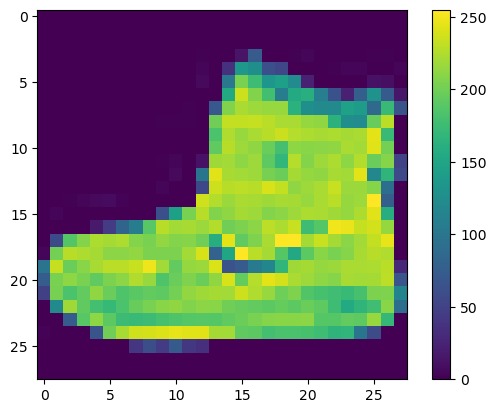

In [13]:
print(type(train_images[0]))
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### Subplot
ฟังก์ชัน subplot นั้นเป็นการ plot รูป หรือ กราฟหลายกราฟในคราวเดียวโดยจะจัดการแสดงผลอยู่ในรูปแบบของตาราง
โดยในที่นี้เราจะต้องกำหนดก่อนว่าจะให้ตารางมีขนาดเท่าไหร่ แถว, หลัก ตามด้วย index ของกราฟ(เริ่มที่ 1)

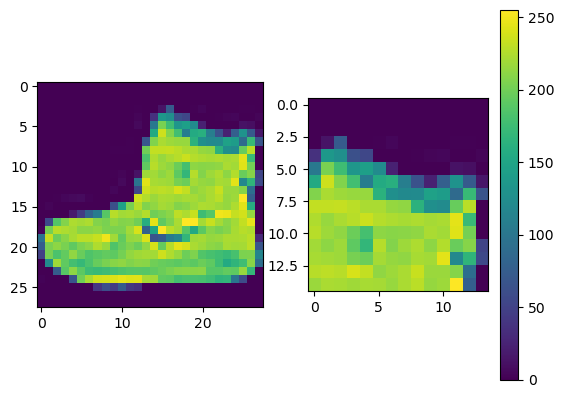

In [14]:
plt.figure()
plt.subplot(1,2,1) 
plt.imshow(train_images[0])
plt.subplot(1,2,2)
plt.imshow(train_images[0][:15,14:]) # top right
plt.colorbar()
plt.grid(False)

### แบบฝึกหัด
ถ้าอยาก ทำ subplot ขนาด 2x2 ที่พล็อตภาพดังนี้
1. ด้านซ้ายบนของ train_images[0]
1. ด้านขวาบนของ train_images[0]
1. ด้านซ้ายล่างของ train_images[0]
1. ด้านขวาล่างของ train_images[0]

แล้วถ้าอยากพล็อตรูป index ที่ 5 ต้องแก้ตรงไหน?

In [15]:
# plt.figure()
# plt.subplot(2,2,1)
# 
# plt.subplot(x, x, x)
#
# plt.subplot(x, x, x)
#
# plt.subplot(x, x, x)
#
# plt.grid(False)

### แบบฝึกหัด
ถ้าเราทำการ reshape ก่อนที่จะพล็อตหละจะเกิดอะไรขึ้น?? <br>
ถ้า train_images[0] ถูก ***reshape*** เป็น ***(14, 56) หรือ (7, 112)***

In [18]:
#### plot แบบ reshape






จริงๆแล้วเราสามารถ loop เพื่อ plot ได้เช่นกัน

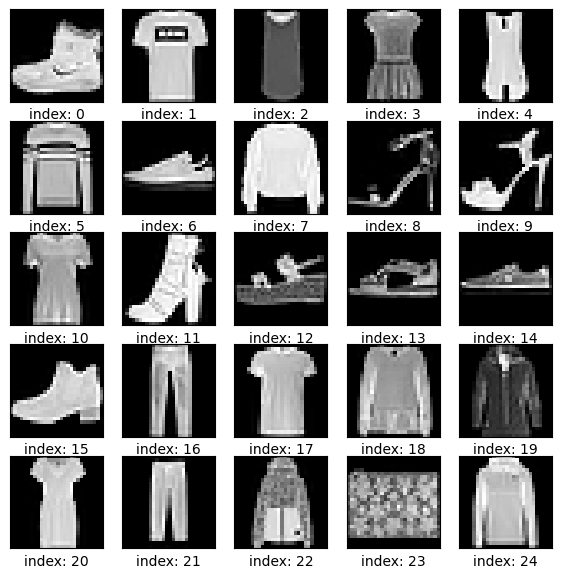

In [17]:
plt.figure(figsize=(7, 7)) # ปรับขนาดกราฟ
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap="grey")
    plt.xlabel(f"index: {i}")

## แบบฝึกหัด
1. จงพล็อตแบบ subplot 6x5
2. โดยใส่รูป 30 รูป

In [2]:
# พล็อตแบบ 6 x 5 






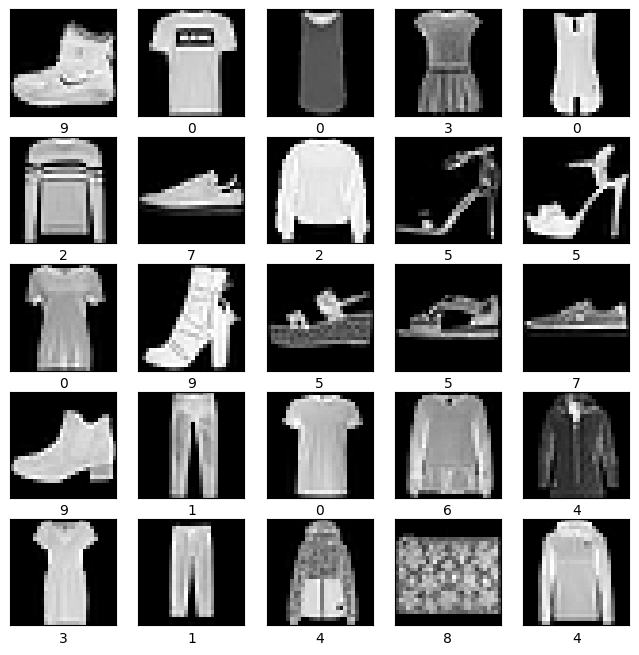

In [14]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap="grey")
    plt.xlabel(train_labels[i]) # เฉลยของแต่ละภาพ

แต่ที่จริงภาพพวกนี้เป็นภาพเฉดเทา หากเราจะเปลี่ยนให้การแสดงผลเป็นภาพเฉดเทาอย่างที่ควรเป็น ในกรณีนี้เราอาจจะ <br/>
1. เปลี่ยน color map เป็นแบบ gray หรือแบบ binary ผ่านคุณสมบัติที่ชื่อว่า **cmap** หรือ <br/>
2. ปรับข้อมูลพิกเซลให้เป็นแบบทศนิยมและบอกให้ matplotlib แสดงผลแบบ binary

## แบบฝึกหัด
ถ้าอยากให้ภาพแต่ละภาพมี text กำกับว่าเป็น class อะไรต้องทำอย่างไร?
เราจะใช้ตัวแปร class_names เข้ามาช่วยได้ไหม?

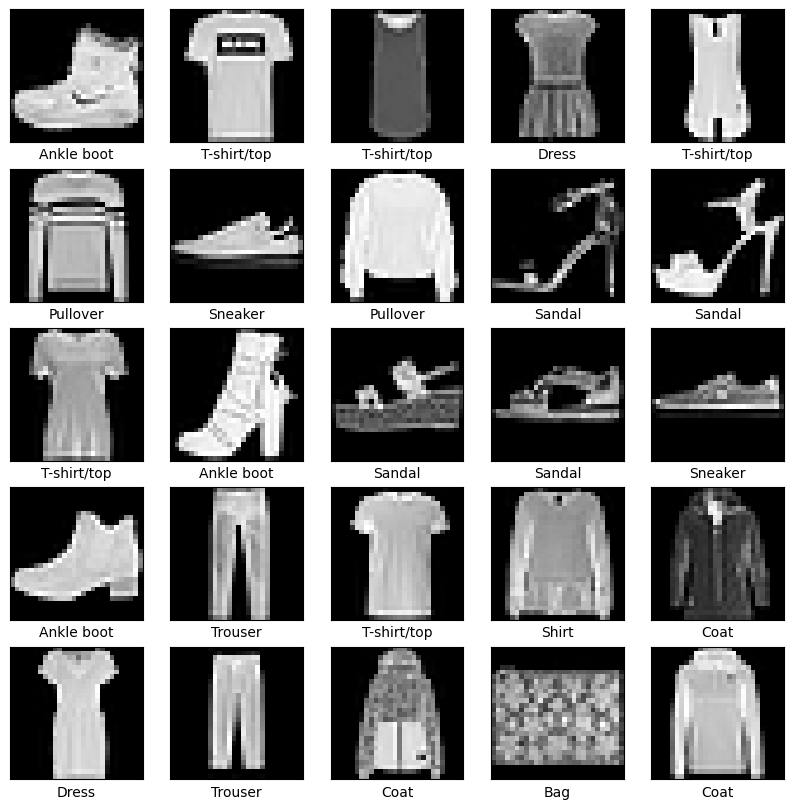

In [15]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="grey")
    # plt.xlabel(???) 
    # เฉลยของแต่ละภาพ แต่ว่าแสดงผลให้อยู่ในรูป string ที่ดึงมาจาก class_names ในตอนต้น

## plt รายละเอียดเพิ่มเติม
ถ้าอยากได้พื้นหลังสีขาว เราเปลี่ยนค่า cmap ให้เป็นแบบ 'binary' หรือ plt.cm.binary ก็ได้ (อันเดียวกัน)
จริงๆแล้ว matplotlib นั้นมี colourmap ให้เลือกหลายแบบมาก เช่น plt.cm.coolwarm_r

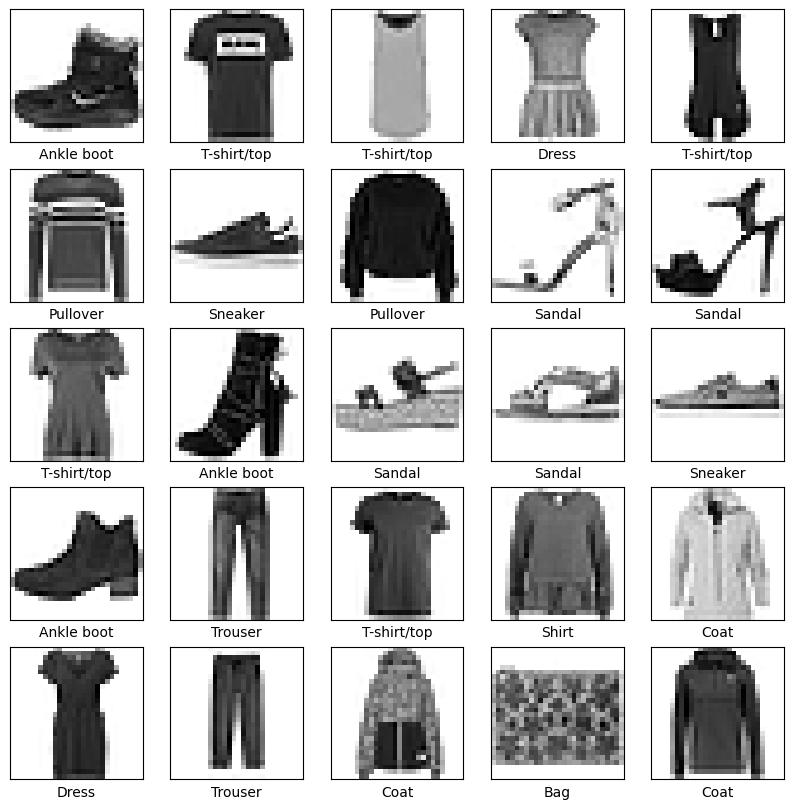

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.gray_r) # American english
    # plt.colorbar()
    # plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

**ว่าแต่การใช้ 'binary' กับ plt.cm.binary ต่างกันอย่างไร**
ค่าของ 'binary' นั้นเป็นสตริง แต่ plt.cm.binary เป็นค่าคงที่จากตัวแปรสำเร็จรูปที่เขาเตรียมไว้ (ดูเซลล์ข้างล่าง)
เมื่อนำไปกำหนดค่าให้กับ cmap ได้ผลสุดท้ายเหมือนกันก็จริง แต่การใช้ค่าคงที่แบบ plt.cm.binary มักจะให้ความเร็วมากกว่าเล็กน้อย (ในที่นี้อาจจะน้อยจนเราไม่อาจรู้สึกได้)
ซึ่งเรามักไม่ต้องสนใจประเด็นนี้ เว้นเสียเราต้องเรียกการกำหนดค่าของ cmap เป็นจำนวนมาก

ส่วน 'gray' ก็มีคู่ของมันเป็น plt.cm.gray เช่นเดียวกัน

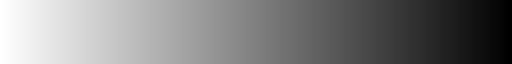

In [17]:
plt.cm.binary

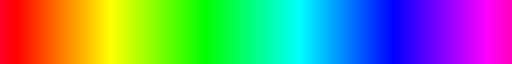

In [18]:
plt.cm.gist_rainbow

In [68]:
print(plt.cm.binary)

-จบตอน